## Final Project Submission

Please fill out:
* Student name: Troy Hendrickson
* Student pace: full time
* Scheduled project review date/time: October 7th, 2022 
* Instructor name: Joseph Mata
* Blog post URL: https://troykhendrix22.blogspot.com/


## Project Overview

In this project I was assigned the task to help Microsoft get into the film industry by using exploratory data analysis, also known as "EDA", to convince potential sharetakers that not only would this be a great industry to invest in but also show the value of what being in the industry is all about. I came up with three proposals that could help guide this company in the right direction of success.  

## Business Problem

Microsoft, one of the largest and most successful tech companies in the world has decided to take its talents elsewhere, the film industry. I was designated to introduce data and make insights on what makes other film companies successful and how Microsoft can use these insights to get started on the right foot in the film industry.

## Data

In this project I used the data from The Numbers, Disney, and IMDB which contained multiple columns of data including genres, worldwide gross, domestic gross, and information on disney's box office transactions over the years.

## Loading the datasets and displaying columns and rows

In [2]:
import pandas as pd 
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import sqlite3 
conn = sqlite3.Connection('zippedData/im.db')

In [56]:
imdb_tables = """
SELECT name FROM sqlite_master WHERE type='table'
"""
pd.read_sql(imdb_tables, conn)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [12]:
movie_basics = pd.read_sql("""
SELECT * FROM movie_basics""", conn)

movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


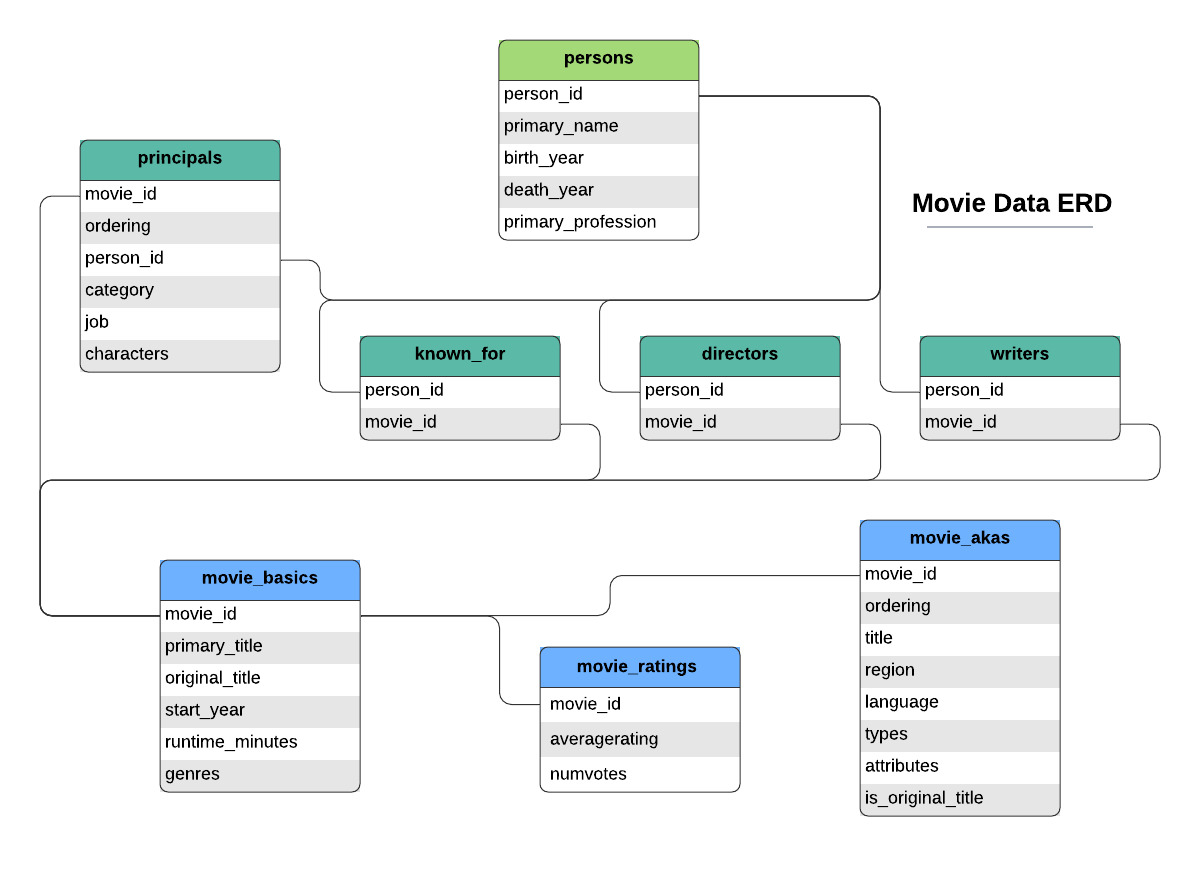

In [7]:
df_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [8]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


- Can see in columns: studio, domestic_gross, and foreign_gross all have null values that will need to be cleaned
- Data types: 1 float, 1 int, 3 objects


In [29]:
df_disney = pd.read_csv('./zippedData/disney_plus_titles.csv')
df_disney

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [10]:
df_movie_info = pd.read_table('./zippedData/rt.movie_info.tsv.gz')
df_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [11]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [12]:
df_movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

- almost entire data set dirty. null values all throughout
- only 1 int and the rest are objects

In [13]:
df_reviews = pd.read_table('zippedData/rt.reviews.tsv.gz', encoding = 'unicode_escape')
df_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [14]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [15]:
df_reviews.date = pd.to_datetime(df_reviews.date)

In [16]:
date2 = df_reviews[df_reviews.date.dt.year >= 2017]
date2

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,2018-05-23
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,2017-11-16
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,2017-10-12
...,...,...,...,...,...,...,...,...
54047,1993,"With Life With Mikey, there's a little bit of ...",NaN,fresh,Malcolm Johnson,0,Hartford Courant,2018-06-08
54058,1995,A god awful committee made action film that fa...,NaN,rotten,Felix Vasquez,0,Cinema Crazed,2017-04-23
54175,1996,"This is a good-looking film, and Jackson is ju...",B,fresh,Joel Siegel,0,Good Morning America,2018-01-04
54348,1999,The Sandlot almost does for baseball what A Ch...,NaN,fresh,Malcolm Johnson,0,Hartford Courant,2018-05-30


- Null values in 5 out of the 8 columns. 
- includes 2 int, 6 objects

In [17]:
df_movies = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
df_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [18]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


- no null values
- 2 float, 3 int, 5 objects

In [64]:
df_budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [70]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


- no null values
- 1 int and 5 objects 

In [21]:
#Change release_date to a datetime type
df_movies.release_date = pd.to_datetime(df_movies.release_date)

In [22]:
#filter films that have happened within past 5 years 2012 - present
release_date = df_movies[df_movies.release_date.dt.year >= 2017]
release_date

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4535,4535,"[99, 80, 36, 10770]",510653,en,Inside The Mob's Bloody Valentine,0.600,2017-03-15,Inside The Mob's Bloody Valentine,8.0,2
14315,14315,"[27, 53]",334536,en,The Blackcoat's Daughter,10.153,2017-03-31,The Blackcoat's Daughter,5.7,254
14353,14353,[27],354216,en,The Devil's Candy,9.291,2017-03-17,The Devil's Candy,6.3,342
15238,15238,[99],333851,en,Romeo Is Bleeding,2.087,2017-07-19,Romeo Is Bleeding,7.5,4
15280,15280,"[35, 10751, 18]",426469,en,Growing Up Smith,1.981,2017-02-03,Growing Up Smith,7.0,16
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [23]:
#Change release_date to a datetime type
df_budgets.release_date = pd.to_datetime(df_budgets.release_date)

In [24]:
#filter films that haave happened within past 5 years 2017 - present
release_date2 = df_budgets[df_budgets.release_date.dt.year >= 2017]
release_date2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,7,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,9,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209"
11,12,2018-05-25,Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347"
...,...,...,...,...,...,...
5571,72,2017-04-28,Sleight,"$250,000","$3,930,990","$3,934,450"
5645,46,2017-06-16,Arrowhead,"$180,000",$0,$0
5685,86,2017-07-07,A Ghost Story,"$100,000","$1,594,798","$2,769,782"
5744,45,2017-01-27,Emily,"$27,000","$3,547","$3,547"


## Question 1: Which genre gives you the greatest ROI and what season gives you the best result?

In [5]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
#Change format of columns and convert them to int
df_budgets['month'] = df_budgets['release_date'].str[:3]
df_budgets['year'] = df_budgets['release_date'].str[-4:]
df_budgets['budget'] = df_budgets['production_budget'].str.replace('$','')
df_budgets['budget'] = df_budgets['budget'].str.replace(',','').astype(int)
df_budgets['domestic'] = df_budgets['domestic_gross'].str.replace('$','')
df_budgets['domestic'] = df_budgets['domestic'].str.replace(',','').astype(int)
df_budgets['worldwide'] = df_budgets['worldwide_gross'].str.replace('$','')
df_budgets['worldwide'] = df_budgets['worldwide'].str.replace(',','').astype(int)
df_budgets['foreign'] = df_budgets['worldwide'] - df_budgets['domestic']


/var/folders/83/sb2tv79n3r11w7g4_w_37bmr0000gn/T/ipykernel_57176/4236560101.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_budgets['budget'] = df_budgets['production_budget'].str.replace('$','')
/var/folders/83/sb2tv79n3r11w7g4_w_37bmr0000gn/T/ipykernel_57176/4236560101.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_budgets['domestic'] = df_budgets['domestic_gross'].str.replace('$','')
/var/folders/83/sb2tv79n3r11w7g4_w_37bmr0000gn/T/ipykernel_57176/4236560101.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=T

In [7]:
df_budgets.rename({'movie':'title'},axis=1,inplace=True)

In [23]:
#Create a function to show the seasons in which each movie was created to later add this column to dataset.
def get_season(month):
    if month in ['Dec','Jan','Feb']:
        return 'Winter'
    elif month in ['Mar','Apr','May']:
        return 'Spring'
    elif month in ['Jun','Jul','Aug']:
        return 'Summer'
    else:
        return 'Fall'

In [9]:
#Filter columns to show movies made in 2012 and after to show data of movies within last 10 years. 
bud_cols = ['title','year','month','budget','domestic','foreign','worldwide']
bud = df_budgets[bud_cols]
bud = bud[bud['year'].astype(int) >= 2012]
#Calculate ROI for domestic and worldwide gross by multiplying the total profit by 100 and then divide by budget.
bud['roi_%_domestic'] = 100*(bud['domestic'] - bud['budget']) / bud['budget']
bud['roi_%_worldwide'] = 100*(bud['worldwide'] - bud['budget']) / bud['budget']
#Calculate Total Profit by subtracting worldwide gross and overall budget. 
bud['total_profit'] = bud['worldwide'] - bud['budget']
#Add new column Season to show when movie was made. 
bud['Season'] = bud['month'].apply(get_season)

In [10]:
bud.head()

,title,year,month,budget,domestic,foreign,worldwide,roi_%_domestic,roi_%_worldwide,total_profit,Season
2,Dark Phoenix,2019,Jun,350000000,42762350,107000000,149762350,-87.782186,-57.210757,-200237650,Summer
3,Avengers: Age of Ultron,2015,May,330600000,459005868,944008095,1403013963,38.840250,324.384139,1072413963,Spring
4,Star Wars Ep. VIII: The Last Jedi,2017,Dec,317000000,620181382,696540365,1316721747,95.640815,315.369636,999721747,Winter
5,Star Wars Ep. VII: The Force Awakens,2015,Dec,306000000,936662225,1116648995,2053311220,206.098766,571.016739,1747311220,Winter
6,Avengers: Infinity War,2018,Apr,300000000,678815482,1369318718,2048134200,126.271827,582.711400,1748134200,Spring


In [328]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   title            146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [14]:
#Merged genres column to dataset
movie_basics.rename({'primary_title':'title'},axis=1,inplace=True)
basics_cols = ['title','genres']
imdb_filter = movie_basics[basics_cols]
merged_budgets = imdb_filter.merge(bud,on = 'title',how = 'right')
#drop duplicates on dataframe
merged_budgets = merged_budgets.drop_duplicates(subset = 'title', keep='first')

In [63]:
merged_budgets.tail(30)

,title,genres,year,month,budget,domestic,foreign,worldwide,roi_%_domestic,roi_%_worldwide,total_profit,Season
2269,Queen Crab,"Action,Sci-Fi,Thriller",2015,Sep,75000,0,0,0,-100.000000,-100.000000,-75000,Fall
2270,Happy Christmas,None,2014,Jul,70000,30312,0,30312,-56.697143,-56.697143,-39688,Summer
2272,Supporting Characters,Comedy,2013,Jan,60000,4917,0,4917,-91.805000,-91.805000,-55083,Winter
2273,The FP,Comedy,2012,Mar,60000,0,0,0,-100.000000,-100.000000,-60000,Spring
2274,Hayride,"Crime,Drama,Horror",2012,Dec,60000,0,0,0,-100.000000,-100.000000,-60000,Winter
2275,The Dirties,"Crime,Drama",2013,Oct,55000,0,0,0,-100.000000,-100.000000,-55000,Fall
2276,Counting,Documentary,2015,Jul,50000,8374,0,8374,-83.252000,-83.252000,-41626,Summer
2277,Down and Dangerous,"Crime,Thriller",2014,Feb,50000,0,0,0,-100.000000,-100.000000,-50000,Winter
2278,Bending Steel,Documentary,2015,Aug,50000,0,0,0,-100.000000,-100.000000,-50000,Summer
2279,"Run, Hide, Die","Horror,Thriller",2015,Sep,50000,0,0,0,-100.000000,-100.000000,-50000,Fall


In [17]:
#create a set for all genres in the dataset
#clean genre column of all null values
genre_set = set()
genre_df = merged_budgets['genres'].dropna()
for genres in genre_df.values:
    genre_list = genres.split(',')
    new_genre_set = set(genre_list)
    genre_set = genre_set.union(new_genre_set)
genre_set = sorted(list(genre_set))
genre_set

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [20]:
#Create new dataframe with set of all genres as column names
budgets_genre = pd.DataFrame()
profit_genre = pd.DataFrame()
#Merge all movies as values for each genre with ROI and Total Profit
for genre in genre_set:
    genre_df_new = merged_budgets[merged_budgets['genres'].str.contains(genre) == True]
    budgets_genre = pd.concat([budgets_genre,genre_df_new['roi_%_worldwide']],axis=1)
    profit_genre = pd.concat([profit_genre,genre_df_new['total_profit']],axis=1)
budgets_genre.columns = genre_set
profit_genre.columns = genre_set
budgets_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1406 entries, 0 to 2065
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Action       377 non-null    float64
 1   Adventure    302 non-null    float64
 2   Animation    85 non-null     float64
 3   Biography    131 non-null    float64
 4   Comedy       434 non-null    float64
 5   Crime        212 non-null    float64
 6   Documentary  69 non-null     float64
 7   Drama        689 non-null    float64
 8   Family       68 non-null     float64
 9   Fantasy      101 non-null    float64
 10  History      48 non-null     float64
 11  Horror       186 non-null    float64
 12  Music        55 non-null     float64
 13  Musical      8 non-null      float64
 14  Mystery      115 non-null    float64
 15  Romance      155 non-null    float64
 16  Sci-Fi       128 non-null    float64
 17  Sport        28 non-null     float64
 18  Thriller     248 non-null    float64
 19  War        

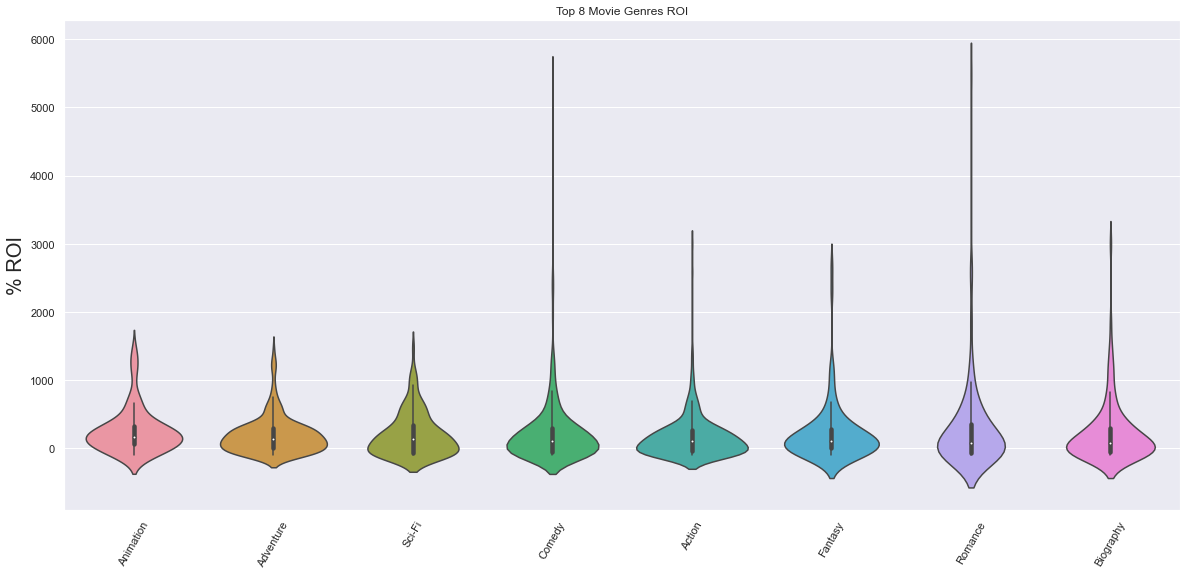

In [42]:
#create new variable indexing top 8 values of genres 
top_genre = budgets_genre[budgets_genre.median().sort_values(ascending=False).index[:8]]
#plot violin plot of top 8 genres 
sns.set(rc={'figure.figsize':(20,9)})
sns.set_theme(style='darkgrid',context='notebook', palette='rocket')
genre_violin = sns.violinplot(data = top_genre)
plt.xticks(rotation = 60)
genre_violin.set_ylabel('% ROI', fontsize=20);
genre_violin.set_title('Top 8 Movie Genres ROI');

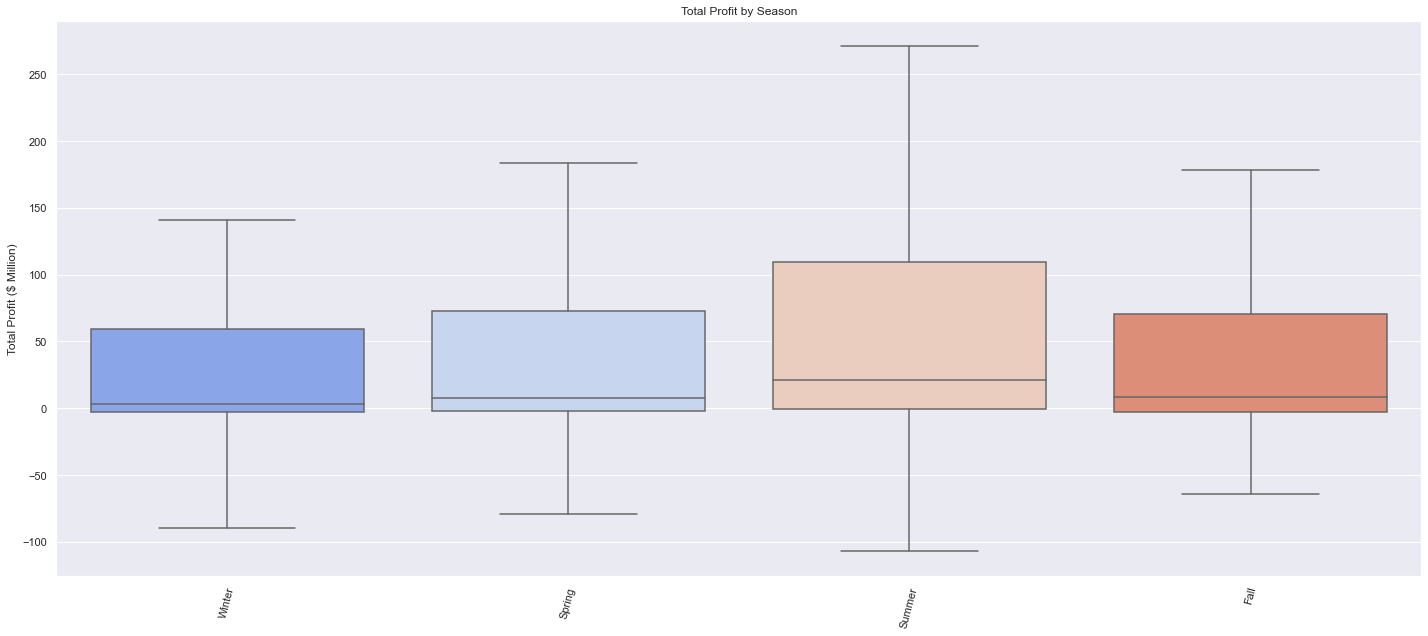

In [24]:
seasons = ['Winter','Spring','Summer','Fall']
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
season_bplot = sns.boxplot(data = merged_budgets,x='Season',y=merged_budgets['total_profit']/1000000,
                           flierprops=flierprops, showfliers=False ,order = seasons, palette='coolwarm',)


season_bplot.set_ylabel('Total Profit ($ Million)');
season_bplot.set_xlabel(None);
plt.xticks(rotation = 75)
season_bplot.set_title('Total Profit by Season');
plt.tight_layout()

- You can see due to the data given the total profit is much greater when a movie is released in summer months and secondly the fall months.

## Question 2: What does our competition look like?

In [284]:
len(df_gross)

3387

In [282]:
#Return the number of missing values. Dataset must be cleaned as foreign gross has missing values 
df_gross.isna().sum() / len(df_gross)

title             0.000000
studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

In [285]:
df_gross["foreign_gross"] = df_gross["foreign_gross"].fillna(0)
#Filling in missing values of foregin gross

In [287]:
df_gross["foreign_gross"] = df_gross["foreign_gross"].str.replace(",", "")
df_gross["foreign_gross"] = df_gross["foreign_gross"].astype(float)
#Changing data type to float

In [288]:
df_gross = df_gross.dropna()
#dropping remaining rows

df_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


In [289]:
#Get the total gross by adding both foreign gross and domestic gross 
df_gross["total_gross"] = df_gross["domestic_gross"] + df_gross["foreign_gross"]
df_gross.head()

/var/folders/83/sb2tv79n3r11w7g4_w_37bmr0000gn/T/ipykernel_48536/74325380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gross["total_gross"] = df_gross["domestic_gross"] + df_gross["foreign_gross"]


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [290]:
df_gross2 = df_gross.groupby("studio").sum().sort_values(
    by="total_gross", ascending = False)
df_gross2.head(8)

,domestic_gross,foreign_gross,year,total_gross
studio,,,,
BV,1.839653e+10,2.579385e+10,209428,4.419038e+10
Fox,1.092450e+10,2.005587e+10,269857,3.098037e+10
WB,1.212360e+10,1.866790e+10,261801,3.079150e+10
Uni.,1.289204e+10,1.685477e+10,290029,2.974681e+10
Sony,8.459479e+09,1.394524e+10,211497,2.240472e+10
Par.,7.580813e+09,1.186338e+10,189311,1.944420e+10
WB (NL),3.975100e+09,6.339000e+09,88628,1.031410e+10
LGF,3.991851e+09,4.475619e+09,175204,8.467471e+09


In [296]:
#index to show top 8 studios
top_8 = df_gross2[0:8]
top_8

,domestic_gross,foreign_gross,year,total_gross
studio,,,,
BV,1.839653e+10,2.579385e+10,209428,4.419038e+10
Fox,1.092450e+10,2.005587e+10,269857,3.098037e+10
WB,1.212360e+10,1.866790e+10,261801,3.079150e+10
Uni.,1.289204e+10,1.685477e+10,290029,2.974681e+10
Sony,8.459479e+09,1.394524e+10,211497,2.240472e+10
Par.,7.580813e+09,1.186338e+10,189311,1.944420e+10
WB (NL),3.975100e+09,6.339000e+09,88628,1.031410e+10
LGF,3.991851e+09,4.475619e+09,175204,8.467471e+09


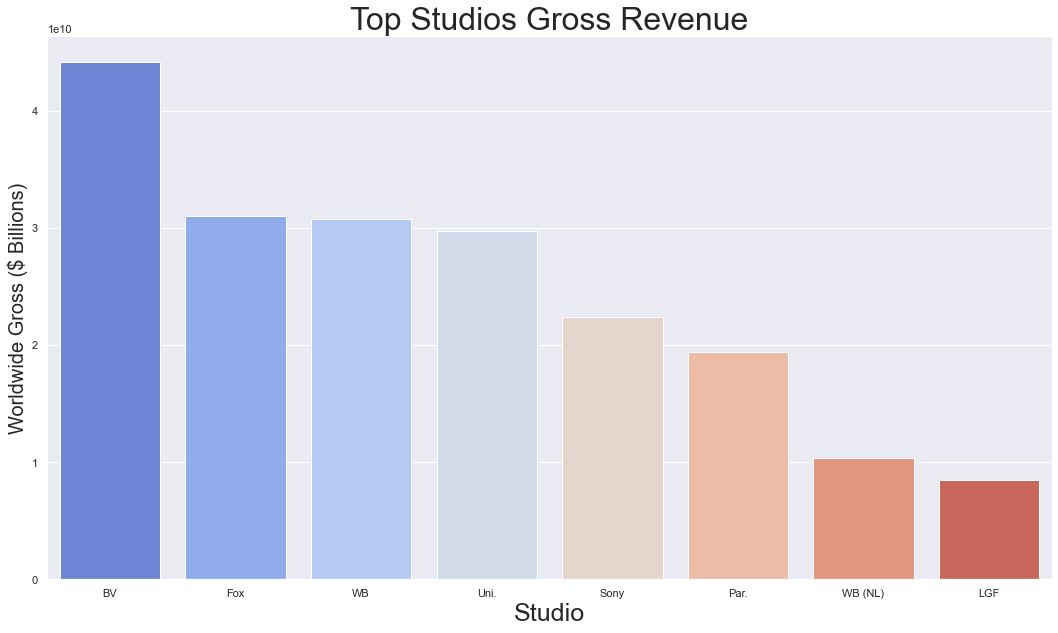

In [319]:
plt.figure(figsize = (18,10))
sns.barplot(y = top_8["total_gross"], x = top_8.index,
            palette="coolwarm")
plt.xlabel('Studio', fontsize=25)
plt.ylabel('Worldwide Gross ($ Billions)', fontsize=20)
plt.title("Top Studios Gross Revenue", fontsize=32)
plt.savefig("Studio_Gross")

- Based on the findings you can see that while Worldwide gross is measured in billions, the majority of top 8 studios all had a return of over a billion dollars. This gives us the confidence that this investment of Microsoft Movies is absolutely a project that can be of value. 

## Question 3: What type of content does our top competition (Disney) produce?

In [30]:
df_disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [31]:
#Rename column listed_in to Genre
df_disney.rename(columns = {"listed_in": "genre"}, inplace=True)

In [32]:
#drop any movie with a release_year before 2012
df_disney.drop(df_disney[df_disney['release_year'] < 2012].index, inplace = True)

In [33]:
#check to make sure rename went through
df_disney.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
1439,s1440,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1442,s1443,Movie,Tomorrowland,Brad Bird,"George Clooney, Hugh Laurie, Britt Robertson, ...","United States, Spain, France, Canada, United K...","September 3, 2021",2015,PG,131 min,"Action-Adventure, Science Fiction",A jaded genius and an optimistic teen unearth ...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.


In [34]:
df_disney.value_counts('type')

type
Movie      406
TV Show    296
dtype: int64

In [35]:
df_disney.value_counts('genre')

genre
Action-Adventure, Animation, Comedy      45
Animals & Nature, Docuseries, Family     37
Animals & Nature, Documentary            34
Animation, Comedy, Family                34
Animals & Nature, Documentary, Family    21
                                         ..
Animation, Kids, Musical                  1
Animation, Kids, Police/Cop               1
Animation, Kids, Western                  1
Animation, Superhero                      1
Variety                                   1
Length: 222, dtype: int64

In [36]:
#drop null values and splot genres so that they look neat
genre_split = ", ".join(df_disney['genre'].dropna()).split(", ")
#create new variable to show the values
count,value = pd.Series(genre_split).value_counts().values[0:10], pd.Series(genre_split).value_counts().index[0:10]
#create a list of the genres and zip them all together
disney_genre = pd.DataFrame(list(zip(value,count)),columns=["genre","count"])
disney_genre

,genre,count
0,Family,230
1,Animation,222
2,Action-Adventure,203
3,Comedy,178
4,Animals & Nature,145
5,Documentary,132
6,Docuseries,118
7,Fantasy,83
8,Coming of Age,70
9,Kids,63


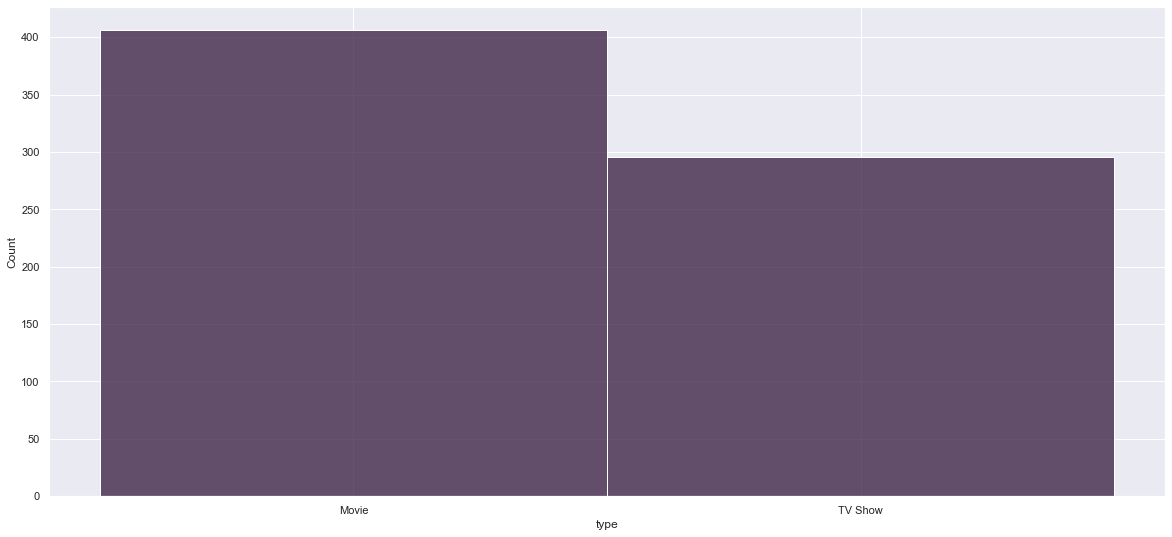

In [37]:
#make histogram showing differnce in movies vs. tv shows 
sns.histplot(x = 'type', data = df_disney)
plt.show()

- This proves the number of movies are greater than the number of tv shows produced within the last 10 years. Movies are still the way to go in terms of production

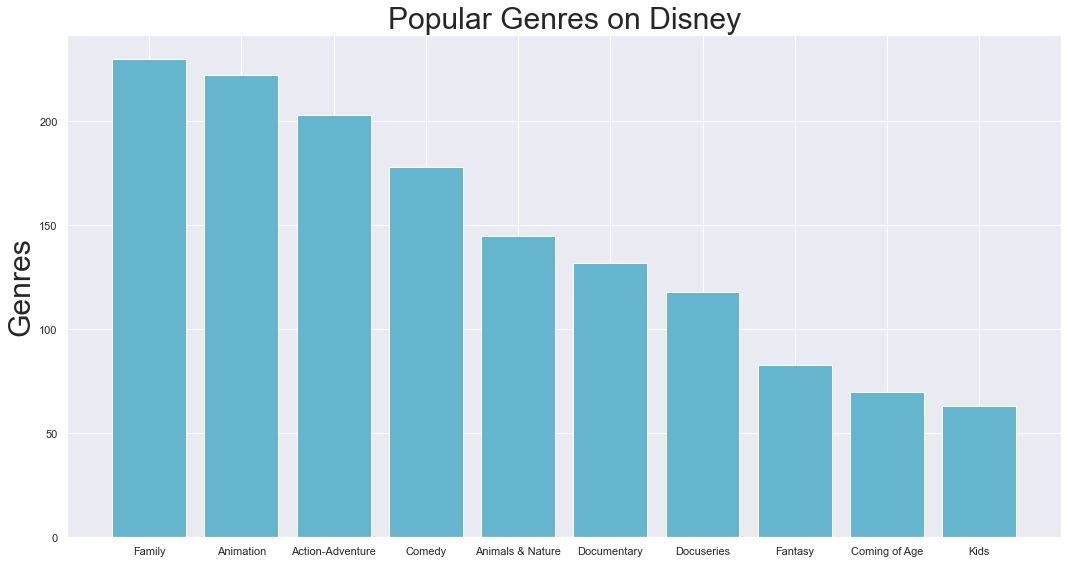

In [55]:
fig, ax = plt.subplots(figsize=(15,8))

# sets up bar plot
ax.bar(value, count, color = 'c')
ax.set_ylabel('Genres', fontsize = 30)
ax.set_title('Popular Genres on Disney', fontsize = 30)
plt.tight_layout()
plt.show()

- This graph shows Family, Animation, and Action-Adventure are the top 3 movie genres that also coincide with the data given through other charts 

## Recommendations and Next Steps 

- Any futher analysis can show more accurate insights:
# Next Steps
## Show the difference in ratings between movies premiered on streaming platforms vs. theater 
This would provide Microsoft with the most accurate information on how cord cutting has become more popular over the years, especially after the pandemic. As we know people love convenience, streaming platforms have taken advantage of the movie industry by providing households with access to thousands of movies without them even leaving the comfort of their own home. Maybe this is something Microsoft can create as well to be just as or even more competitive as the big names out there including: Netflix, Disney+, Hulu, etc. 
## Include difference in the runtime of movies vs. ratings
Does a long movie necessarily mean it was a good movie? This would provide microsoft with the information needed to understand how to go about producing their own future "classics" and how long each movie would necessarily need to be in order to receive the best ratings. 
## Are limited series tv shows more popular?
Binge watching tv shows are now more poular than ever, but are they more popular than a movie? Showing the popularity in tv shows vs movies can give more of an understanding of where to start within the film industry. This can also provide the information of what genres of tv shows are most gravitating towards audiences. 

# Recommendations
Showing the ROI of the Top 8 movie genres have showed that Animation, Adventure and Sci-Fi are the top producing movie genres according to the data given. Big time movies like Star Wars can prove this point futher in which they have received profits in the billions.

Having the total profit by season allows us to see during which months do movies do well in. The data given shows that the total profit is much greater when a movie is released in summer months and secondly the fall months. With Microsoft planning its first release it is recommended to release during those seasons of the year according to the graph above. 

You can also see through the information provided that the best studios(BV, Fox and Warner Bros) have the most competition due to the worldwide gross. Also diving deeper into Disney specifically shows the importance of movies vs. tv shows and what genres perform.

Microsoft also known for Xbox, has alot of games they produce that can only be played on that specific console. Why not come out with a movie or limited series that features a storyline of these games. This would also fit within the adventure, animation, and sci-fi recommendations above. 
